In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
from astropy.io import fits
from astropy.table import Table
import astropy.units as u
import pandas as pd
import seaborn as sns

In [2]:
colorblind_palette = sns.color_palette("colorblind")

In [3]:
asu = fits.open(r"C:\Users\callo\SURP Project\Tables-data\tablef1.fit")
#asu[1].header

In [4]:
tbl = Table.read(asu[1], format = 'fits')
data1 = tbl.to_pandas()
pd.set_option('display.max_rows', 100)
#data1

In [5]:
index_list = [[0,9],[10,29],[30,40],[41,51],[52,59],[60,66],[67,72],[73,78],[79,85],[86,92],[93,98],[99,105],[106,112],[113,118],[119,125],
           [126,131],[132,138],[139,146],[147,151],[152,171],[172,174],[175,180],[181,182],[183,195],[196,212],[213,221],[222,229],[230,238],
           [239,242],[243,256],[257,262],[263,268],[269,277],[278,285],[286,291],[292,297],[298,303],[304,309],[310,315],[316,321],[322,327],
           [328,333],[334,335],[336,341],[342,346],[347,352],[353,354],[355,356],[357,358],[359,360],[361,366],[367,373],[374,379],[380,385],
           [386,391],[392,415],[416,429],[430,431]]
row_list = []
with open (r"C:\Users\callo\SURP Project\Tables-data\table2data_only.txt") as file:
    f = file.readlines()
    for i in f:
        a = []
        for n in range(len(index_list)):
            try:
                if n != 56 and n != 48 and n != 47 and n != 24 and n != 25 and n != 29 and n != 47 and n !=48 and n != 49 and n != 55:
                    a.append(float(i[index_list[n][0]:index_list[n][1]]))
                else:
                    a.append(str(i[index_list[n][0]:index_list[n][1]]))
            except:
                a.append(None)
        row_list.append(a)
    file.close()

In [6]:
def cluster_age(n):
    '''
    
    '''
    n = n.Cluster
    if n == "IC_2391      ":
        return 42
    elif n == 'Collinder_135':
        return 40
    elif n == 'NGC_2451A    ':
        return 50
    elif n == 'NGC_2547     ':
        return 35.4
    elif n == 'IC_2602      ':
        return 42
    else:
        return 0


In [7]:
data2 = pd.DataFrame(row_list,columns=[f"Column_{i+1}" for i in range(len(row_list[0]))])
data2 = data2.rename(columns = {'Column_1': 'TIC','Column_2': 'Gaia','Column_3': 'RAdeg','Column_4': 'DEdeg','Column_5': 'PMRA','Column_6': 'PMDE','Column_7': 'plx','Column_8': 'plxC','Column_9': 'RUWE','Column_10': 'Gmag','Column_11': 'e_Gmag','Column_12': 'GmagC','Column_13': 'BPmag','Column_14': 'e_BPmag','Column_15': 'RPmag','Column_16': 'e_RPmag','Column_17': 'Tmag','Column_18': 'Rcont','Column_19': 'o_Rcont','Column_20': 'HDB-MProb','Column_21': 'HDB-Clst','Column_22': 'HDB-Stab','Column_23': 'MemBool','Column_24': 'ADis-GES','Column_25': 'GES','Column_26': 'GES-Clst','Column_27': 'GES-MProb','Column_28': 'ADis-CG','Column_29': 'CG-MemProb','Column_30': 'CG-Clst','Column_31': 'AV','Column_32': 'e_AV','Column_33': 'Dis','Column_34': 'e_Dis','Column_35': 'logA','Column_36': 'e_logA','Column_37': 'Mass','Column_38': 'e_Mass','Column_39': 'logTeff','Column_40': 'e_logTeff','Column_41': 'Prot1','Column_42': 'Pw1','Column_43': 'Q1','Column_44': 'Sig','Column_45': 'Prot2','Column_46': 'Pw2','Column_47': 'Q2','Column_48': 'MP?','Column_49': 'SE?','Column_50': 'Bl?','Column_51': 'CN-Sep','Column_52': 'CN-MagDiff','Column_53': 'BN-Sep','Column_54': 'BN-MagDiff','Column_55': 'Lit-Per','Column_56': 'r_Lit-Per','Column_57': 'Cluster','Column_58': 'to-plot'})
data2['Age'] = data2.apply(cluster_age, axis = 1)
data2

,TIC,Gaia,RAdeg,DEdeg,PMRA,PMDE,plx,plxC,RUWE,Gmag,...,Bl?,CN-Sep,CN-MagDiff,BN-Sep,BN-MagDiff,Lit-Per,r_Lit-Per,Cluster,to-plot,Age
0,NaN,5.318533e+18,130.871579,-52.691608,-1.510,4.182,1.793,1.812,1.144,18.874,...,n,7.15,-8.94,57.31,-1.55,NaN,,IC_2391,0.0,42.0
1,44999952.0,5.317682e+18,129.502314,-55.105625,-23.494,24.976,6.465,6.513,1.140,16.079,...,y,5.42,0.41,30.68,1.69,NaN,,IC_2391,0.0,42.0
2,45049176.0,5.318059e+18,129.795440,-54.016857,-24.058,24.196,6.714,6.759,1.150,17.373,...,y,12.76,-2.28,58.07,0.30,NaN,,IC_2391,1.0,42.0
3,45050711.0,5.317838e+18,129.793134,-54.603170,-25.183,24.407,6.818,6.861,0.999,16.838,...,y,8.01,2.65,8.01,2.65,NaN,,IC_2391,1.0,42.0
4,45181378.0,5.317840e+18,129.879736,-54.513893,-25.376,24.585,6.850,6.891,1.006,17.833,...,y,6.85,-0.34,33.87,1.20,NaN,,IC_2391,1.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,912058973.0,5.239934e+18,160.074630,-63.693865,-17.230,9.902,6.581,6.581,1.068,17.419,...,y,0.90,1.91,54.67,4.67,NaN,,IC_2602,1.0,42.0
2367,913701079.0,5.241344e+18,163.114120,-62.761163,-18.669,8.392,6.536,6.536,1.303,18.192,...,y,2.55,2.39,54.16,4.58,NaN,,IC_2602,0.0,42.0
2368,913850848.0,5.241448e+18,160.269351,-63.279238,-19.615,9.988,6.457,6.463,3.721,12.600,...,y,0.92,0.52,0.92,0.52,NaN,,IC_2602,0.0,42.0
2369,913996012.0,5.241541e+18,162.112429,-62.756388,-18.780,9.272,6.662,6.706,1.142,16.213,...,y,2.27,-4.86,57.54,3.87,NaN,,IC_2602,1.0,42.0


In [8]:
# Getting rid of annoying verify errors from reading fits file of Curtis 2022 table 1 data set
from astropy.io.fits.verify import VerifyWarning
import warnings
warnings.simplefilter('ignore', category=VerifyWarning)

In [9]:
asu1 = fits.open(r"C:\Users\callo\SURP Project\Tables-data\Curtis 2022 1.fit")
tbl1 = Table.read(asu1[1], format = 'fits')
data3 = tbl1.to_pandas()
pd.set_option('display.max_columns', 100)

In [10]:
asu2 = fits.open(r"C:\Users\callo\SURP Project\Tables-data\Curtis 2022 5.fit")
tbl2 = Table.read(asu2[1], format = 'fits')
data4 = tbl2.to_pandas()
data4['Age'] = data4['Age'] * 10**3 # Puts all age data into Myr insteaf of Gyr
data4['Age'].max()
data4

,Cluster,Age,Av,GaiaDR2,OName,RA_ICRS,DE_ICRS,BP-RP,__BP-RP_0,Gmag,gmag_lc,Teff,Prot,R147,Simbad,_RA_icrs,_DE_icrs
0,Pleiades,120.0,0.12,67618285777617664,EPIC 210990525,53.882158,22.823390,0.7103,0.660386,9.7295,3.95639,6291.70,2.7953,0,Simbad,53.882158,22.823390
1,Pleiades,120.0,0.12,67832346947351424,EPIC 211051975,54.046203,23.806264,3.1460,3.096090,17.2698,11.49670,3122.60,0.5490,0,Simbad,54.046203,23.806264
2,Pleiades,120.0,0.12,64597927335800064,EPIC 210977505,54.101510,22.623601,1.7721,1.722190,13.5183,7.74519,4036.81,11.1805,0,Simbad,54.101510,22.623601
3,Pleiades,120.0,0.12,67724697887107200,EPIC 211010818,54.160077,23.145484,3.1703,3.120390,17.5594,11.78630,3110.94,0.3040,0,Simbad,54.160077,23.145484
4,Pleiades,120.0,0.12,67756789882795008,EPIC 211025925,54.485193,23.382239,2.7972,2.747290,15.8874,10.11430,3304.18,0.8969,0,Simbad,54.485193,23.382239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,Ruprecht 147,2700.0,0.30,4183867079159884672,EPIC 219489683,289.460250,-16.624023,1.8770,1.752500,15.3750,7.71700,4007.67,19.1114,1,Simbad,289.460250,-16.624023
919,Ruprecht 147,2700.0,0.30,4087824807196545664,EPIC 219439085,288.586900,-16.749012,2.0406,1.916100,15.5517,7.89370,3867.11,19.7648,1,Simbad,288.586900,-16.749012
920,Ruprecht 147,2700.0,0.30,4084617394338908672,EPIC 218986703,288.978840,-17.770926,2.1041,1.979600,15.8266,8.16860,3818.26,22.5664,1,Simbad,288.978840,-17.770926
921,Ruprecht 147,2700.0,0.30,4088060892960421248,EPIC 219619241,288.383960,-16.286807,2.2064,2.081900,16.2221,8.56410,3743.76,21.6887,1,Simbad,288.383960,-16.286807


In [11]:
#Setting Columns in new data set to what they to make calling them easer.
RAdeg1 = data2['RAdeg']
DEdeg1 = data2['DEdeg']

filt1 = data2['Cluster']== 'IC_2391      '
IC_2391 = data2[filt1]

filt2 = data2['Cluster']== 'Collinder_135'
Collinder_135 = data2[filt2]

filt3 = data2['Cluster']== 'NGC_2451A    '
NGC_2451A = data2[filt3]

filt4 = data2['Cluster']== 'NGC_2547     '
NGC_2547 = data2[filt4]

filt5 = data2['Cluster']== 'IC_2602      '
IC_2602 = data2[filt5]

Text(0, 0.5, '$\\mu_{DE}$(deg)')

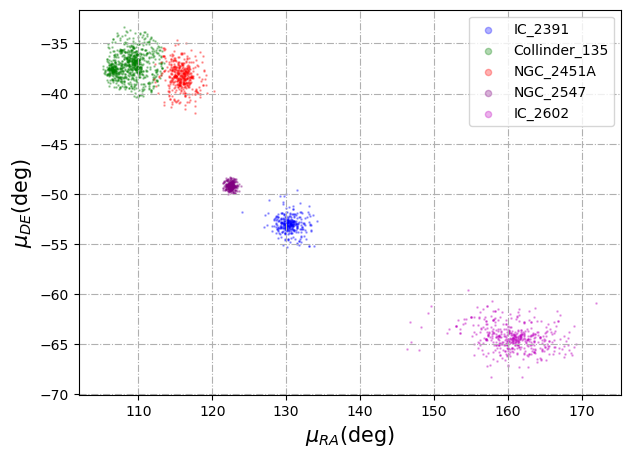

In [12]:
#To get this plot to work I had to add a fake TIC identifier code for 3 stars. The fake identity code is 999999999
#edit: did not have to do this and created a new line of code to parse the data
plt.figure(figsize=(7, 5))

#IC_2391
plt.scatter(IC_2391['RAdeg'], IC_2391['DEdeg'], s = 0.8, alpha = 0.3, c = 'b', label = 'IC_2391')
#Collinder_135
plt.scatter(Collinder_135['RAdeg'], Collinder_135['DEdeg'], s = 0.8, alpha = 0.3, c = 'g', label = 'Collinder_135')
#NGC_2451A
plt.scatter(NGC_2451A['RAdeg'], NGC_2451A['DEdeg'], s = 0.8, alpha = 0.3, c = 'r', label = 'NGC_2451A')
#NGC_2547
plt.scatter(NGC_2547['RAdeg'], NGC_2547['DEdeg'], s = 0.8, alpha = 0.3, c = 'purple', label = 'NGC_2547')
#IC_2602
plt.scatter(IC_2602['RAdeg'], IC_2602['DEdeg'], s = 0.8, alpha = 0.3, c = 'm', label = 'IC_2602')

plt.legend(scatterpoints=1, fontsize=10, markerscale=5)
plt.grid(True, linestyle = '-.')
plt.xlabel(r'$\mu_{RA}$(deg)', size = 15)
plt.ylabel(r'$\mu_{DE}$(deg)', size = 15)

#plt.savefig('mapofsky.png')

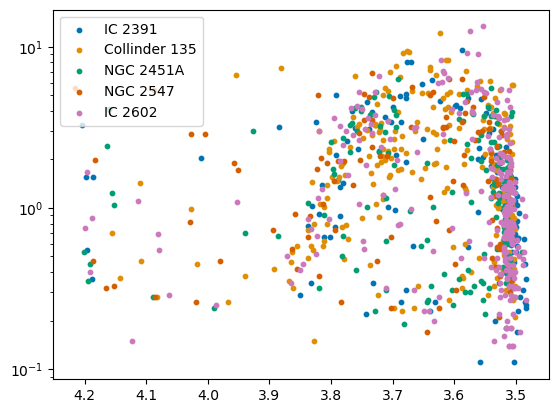

In [13]:
Teff = data2['logTeff']
prot = data2['Prot1']
protb = data2['Prot2']

plt.scatter(Teff, prot, s = 1)

plt.scatter(IC_2391['logTeff'], IC_2391['Prot1'], s = 10, color=colorblind_palette[0], label = 'IC 2391')
plt.scatter(Collinder_135['logTeff'], Collinder_135['Prot1'], s = 10, color=colorblind_palette[1], label = 'Collinder 135')
plt.scatter(NGC_2451A['logTeff'], NGC_2451A['Prot1'], s = 10, color=colorblind_palette[2], label = 'NGC 2451A')
plt.scatter(NGC_2547['logTeff'], NGC_2547['Prot1'], s = 10, color=colorblind_palette[3], label = 'NGC 2547')
plt.scatter(IC_2602['logTeff'], IC_2602['Prot1'], s = 10, color=colorblind_palette[4], label = 'IC 2602')

plt.legend()
plt.yscale('log')
plt.gca().invert_xaxis()
#plt.savefig('protvteff.png')

In [14]:
Gbp = data2['BPmag']
Grp = data2['RPmag']
Dis = data2['Dis']

In [15]:
filt6 = (data2['GES-MProb']>=0.9) & (data2['GES-MProb']<=1.0)
mem = data2[filt6]

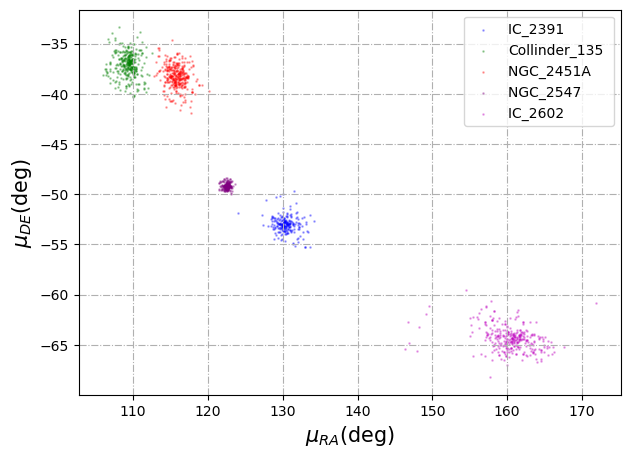

In [16]:
filt7 = (data2['CG-MemProb']>=0.7) & (data2['CG-MemProb']<=1.0)
mem1 = data2[filt7]
colors=['b','g','r','purple','m']
plt.figure(figsize = [7,5])

for n,cluster in enumerate(['IC_2391      ', 'Collinder_135', 'NGC_2451A    ', 'NGC_2547     ', 'IC_2602      ',]):
    filt8 = mem1['Cluster']== cluster
    cls_data = mem1[filt8]
    plt.scatter(cls_data['RAdeg'], cls_data['DEdeg'],label=f"{cluster}", s = 0.8, alpha = 0.3,c=colors[n])

plt.grid(True, linestyle = '-.')
plt.xlabel(r'$\mu_{RA}$(deg)', size = 15)
plt.ylabel(r'$\mu_{DE}$(deg)', size = 15)
plt.legend()
plt.show()

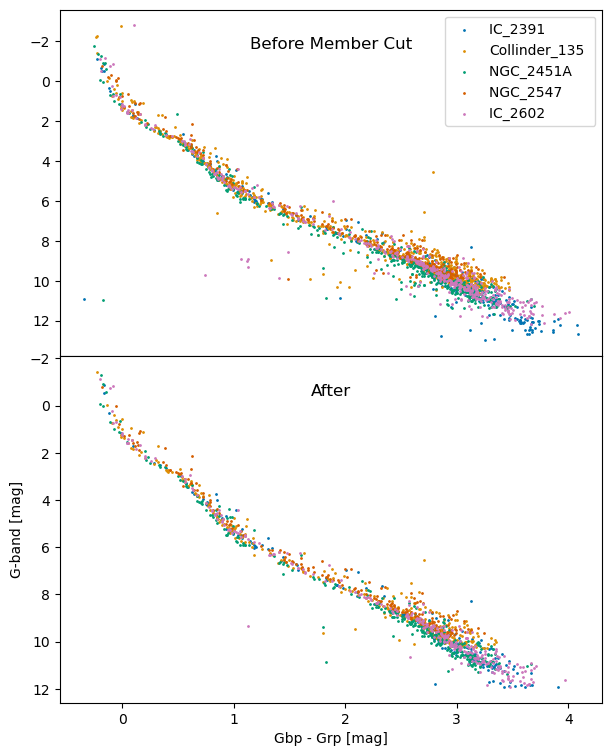

In [17]:
clrind = (Gbp - Grp) #color-index
gmag = data2['GmagC']

r'''
To get this to work for pandas I will have to use the Columns
denotion

(Cluster['GmagC'] - (5 * np.log10(Cluster['Dis'])) + 5 - Cluster['AV'])
'''

fig, ax = plt.subplots(2,1, figsize = [7,9], sharex = True)
plt.subplots_adjust(hspace=0)
#Extincion in V-band
Av = data2['AV'] 
#Absolute mag after taking extinction into account
for n,cluster in enumerate(['IC_2391      ', 'Collinder_135', 'NGC_2451A    ', 'NGC_2547     ', 'IC_2602      ',]):
    fil = data2['Cluster']== cluster
    Cluster = data2[fil]
    x = (Cluster['BPmag'] - Cluster['RPmag'])
    y = ((Cluster['Gmag']) - 5 * np.log10(Cluster['Dis']) + 5 - Cluster['AV'])
    ax[0].scatter(x, y, s=1, label=f'{cluster}', color=colorblind_palette[n])
    ax[0].invert_yaxis()

for n,cluster in enumerate(['IC_2391      ', 'Collinder_135', 'NGC_2451A    ', 'NGC_2547     ', 'IC_2602      ',]):
    filt8 = mem1['Cluster']== cluster
    cls_data = mem1[filt8]
    x = (cls_data['BPmag'] - cls_data['RPmag'])
    y = ((cls_data['Gmag']) - 5 * np.log10(cls_data['Dis']) + 5 - cls_data['AV'])
    ax[1].scatter(x, y, s=1, label=f'{cluster}', color=colorblind_palette[n])
    ax[1].invert_yaxis()
    
#y = (Cluster['Gmag'] - (5 * np.log10(Cluster['Dis'])) + 5 - Cluster['AV'])
plt.xlabel('Gbp - Grp [mag]')
plt.ylabel('G-band [mag]')
ax[0].text(0.5, 0.9, 'Before Member Cut', horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes, fontsize=12)
ax[1].text(0.5, 0.9, 'After', horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes, fontsize=12)
ax[0].legend()
#plt.savefig('seperation.png')
plt.show()

In [18]:
print(
    'IC 2391 is 50Myr,'
    ' IC 2602 is 45Myr,'
    ' NGC 2451A is ~50-80Myr,'
    ' Collinder 135 is ~40-50Myr,'
    ' NGC 2547 is ~20-35Myr,')
#This is inconsistet with the data. These ages are off by some amount. The plot is telling me that NGC 2547 is the oldest, however literature
#is saying that it is one of the youngest out of my cluters.

IC 2391 is 50Myr, IC 2602 is 45Myr, NGC 2451A is ~50-80Myr, Collinder 135 is ~40-50Myr, NGC 2547 is ~20-35Myr,


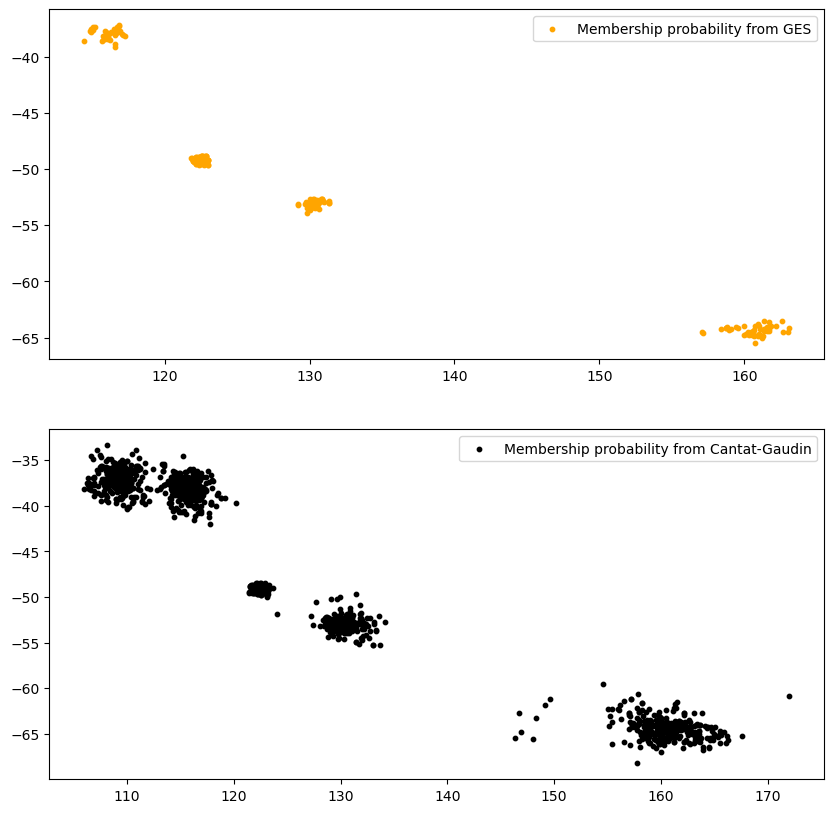

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = [10,10])

ax1.scatter(mem['RAdeg'], mem['DEdeg'], s = 10, label = 'Membership probability from GES', c = 'orange')
ax2.scatter(mem1['RAdeg'], mem1['DEdeg'], s = 10, label = 'Membership probability from Cantat-Gaudin', c = 'black')

ax1.legend(markerscale=1)
ax2.legend(markerscale=1)
#plt.savefig('member check.png')
plt.show()

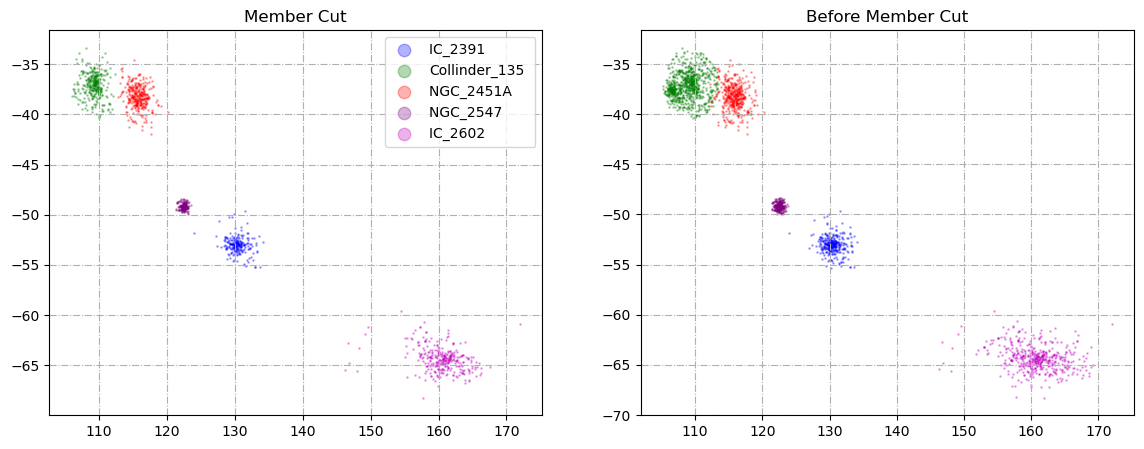

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = [14, 5])
colors=['b','g','r','purple','m']

for n,cluster in enumerate(['IC_2391      ', 'Collinder_135', 'NGC_2451A    ', 'NGC_2547     ', 'IC_2602      ',]):
    filt8 = mem1['Cluster']== cluster
    cls_data = mem1[filt8]
    ax1.scatter(cls_data['RAdeg'], cls_data['DEdeg'],label=f"{cluster}", s = 0.8, alpha = 0.3,c=colors[n])
    
for n,cluster in enumerate(['IC_2391      ', 'Collinder_135', 'NGC_2451A    ', 'NGC_2547     ', 'IC_2602      ',]):
    filt9 = data2['Cluster']== cluster
    cls_data1 = data2[filt9]
    ax2.scatter(cls_data1['RAdeg'], cls_data1['DEdeg'],label=f"{cluster}", s = 0.8, alpha = 0.3,c=colors[n])
    
ax1.grid(True, linestyle = '-.')
ax2.grid(True, linestyle = '-.')
ax1.set_title('Member Cut')
ax2.set_title('Before Member Cut')
ax1.legend(markerscale = 10)
#plt.savefig('comparison.png')
plt.show()

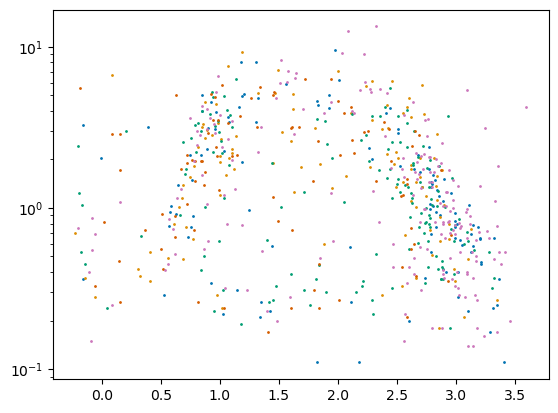

In [21]:
filt7 = (data2['CG-MemProb']>=0.7) & (data2['CG-MemProb']<=1.0)
mem1 = data2[filt7]
for n,cluster in enumerate(['IC_2391      ', 'Collinder_135', 'NGC_2451A    ', 'NGC_2547     ', 'IC_2602      ',]):
    filt8 = mem1['Cluster']== cluster
    cls_data = mem1[filt8]
    x = (cls_data['BPmag'] - cls_data['RPmag'])
    y = cls_data['Prot1']
    plt.scatter(x, y, s=1, label=f'{cluster}', color=colorblind_palette[n])
plt.yscale('log')
plt.show()    

In [22]:
Prot1 = data4['Prot']
Age1 = data4['Age']
Prot2 = data2['Prot1']
Age2 = data2['Age']

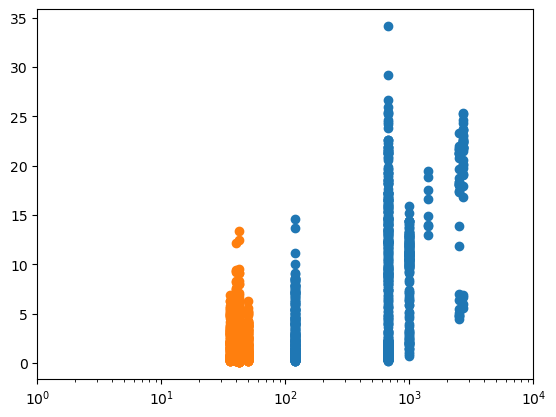

In [23]:
plt.scatter(Age1, Prot1)
plt.scatter(Age2, Prot2)

plt.xscale('log')
plt.xticks([1, 10, 100, 1000, 10000])
#plt.savefig('prot_age.png')
plt.show()

In [24]:
# I want to see what my percentiles will be
print(np.nanpercentile(data2['Prot1'], [10, 90]), 'From 0 - 0.325 (10th) and then from 0.325 - 4.545 (90th)') # Using .nan because there are some rows where there are no values for rotation
print(np.nanpercentile(data4['Prot'], [10, 90]), 'From 0 - 0.51536 (10th) and then from 0.51536 - 18.19(90th)')

[0.325 4.545] From 0 - 0.325 (10th) and then from 0.325 - 4.545 (90th)
[ 0.51536 18.19   ] From 0 - 0.51536 (10th) and then from 0.51536 - 18.19(90th)


In [25]:
data4.Prot.quantile(q = .1, interpolation = 'lower')

0.515

In [26]:
filt9 = (data2['Prot1'] <= data2.Prot1.quantile(q = .1))
perc2_10 = data2[filt9]
filt10 = (data4['Prot'] <= data4.Prot.quantile(q = .1))
perc1_10 = data4[filt10]
filt11 = (data2['Prot1'] <= data2.Prot1.quantile(q=.9))
perc2_90 = data2[filt11]
filt12 = (data4['Prot'] <= data4.Prot.quantile(q=.9))
perc1_90 = data4[filt12]

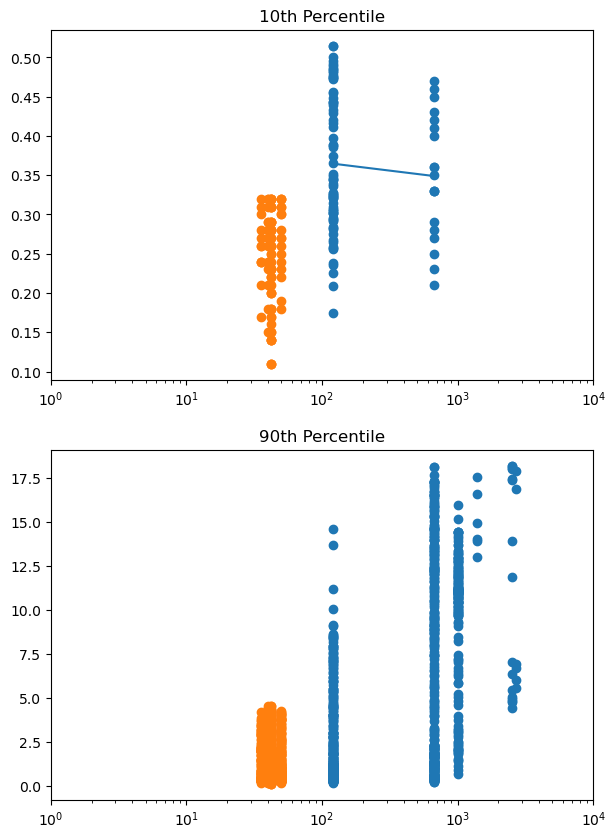

In [27]:
fig, ax = plt.subplots(2, 1, figsize = [7, 10])

poly = np.polyfit(perc1_10['Age'], perc1_10['Prot'], 1)
fit = np.poly1d(poly)

ax[0].plot(perc1_10['Age'], fit(perc1_10['Age']))
ax[0].scatter(perc1_10['Age'], perc1_10['Prot'])
ax[0].scatter(perc2_10['Age'], perc2_10['Prot1'])
ax[1].scatter(perc1_90['Age'], perc1_90['Prot'])
ax[1].scatter(perc2_90['Age'], perc2_90['Prot1'])


ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_xticks([1, 10, 100, 1000, 10000])
ax[1].set_xticks([1, 10, 100, 1000, 10000])
ax[0].set_title('10th Percentile')
ax[1].set_title('90th Percentile')
#plt.savefig('percentile.png')
plt.show()

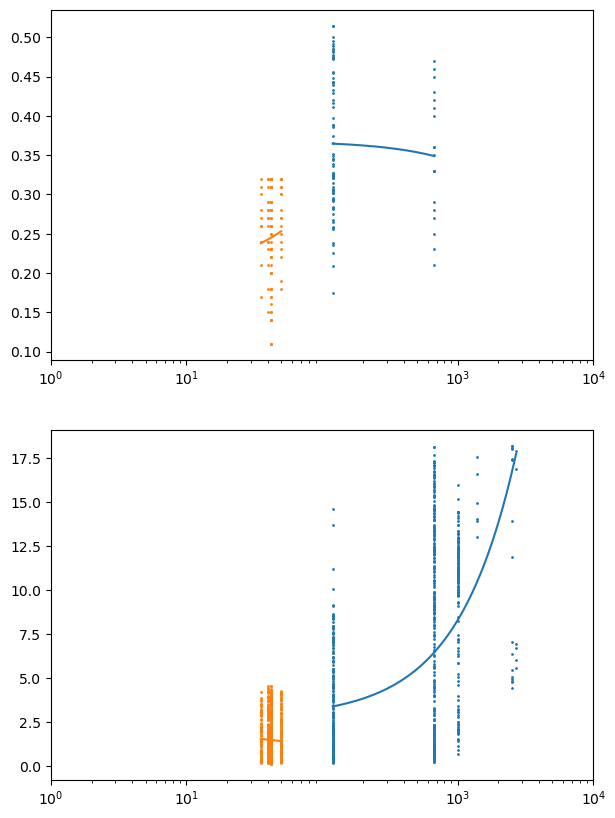

In [28]:
fig, ax = plt.subplots(2, 1, figsize = [7, 10])
data = [(perc1_10, perc2_10), (perc1_90, perc2_90)]

for n,(cut1, cut2) in enumerate(data):
    poly1 = np.polyfit(cut1['Age'], cut1['Prot'], 1)
    fit1 = np.poly1d(poly1)
    poly2 = np.polyfit(cut2['Age'], cut2['Prot1'], 1)
    fit2 = np.poly1d(poly2)
    
    xs1 = np.linspace(min(cut1['Age']), max(cut1['Age']), 500)
    xs2 = np.linspace(min(cut2['Age']), max(cut2['Age']), 500)
    
    ax[n].plot(xs1, fit1(xs1))
    ax[n].plot(xs2, fit2(xs2))
    ax[n].scatter(cut1['Age'], cut1['Prot'], s = 1)
    ax[n].scatter(cut2['Age'], cut2['Prot1'], s = 1)
    ax[n].set_xscale('log')
    ax[n].set_xticks([1, 10, 1000, 10000])
#plt.savefig('percentile_revamped.png')    

In [29]:
data2['Prot'] = data2['Prot1']

In [30]:
df1 = data2[['Cluster', 'Age', 'Prot']]
df2 = data4[['Cluster', 'Age', 'Prot']]

data5 = pd.concat([df1, df2])
data5

,Cluster,Age,Prot
0,IC_2391,42.0,NaN
1,IC_2391,42.0,0.3100
2,IC_2391,42.0,NaN
3,IC_2391,42.0,0.7800
4,IC_2391,42.0,NaN
...,...,...,...
918,Ruprecht 147,2700.0,19.1114
919,Ruprecht 147,2700.0,19.7648
920,Ruprecht 147,2700.0,22.5664
921,Ruprecht 147,2700.0,21.6887


In [31]:
filt9 = (data5['Prot'] <= data5.Prot.quantile(q = .1))
perc_10 = data5[filt9]
filt10 = (data5['Prot'] <= data5.Prot.quantile(q=.9))
perc_90 = data5[filt10]

ValueError: too many values to unpack (expected 2)

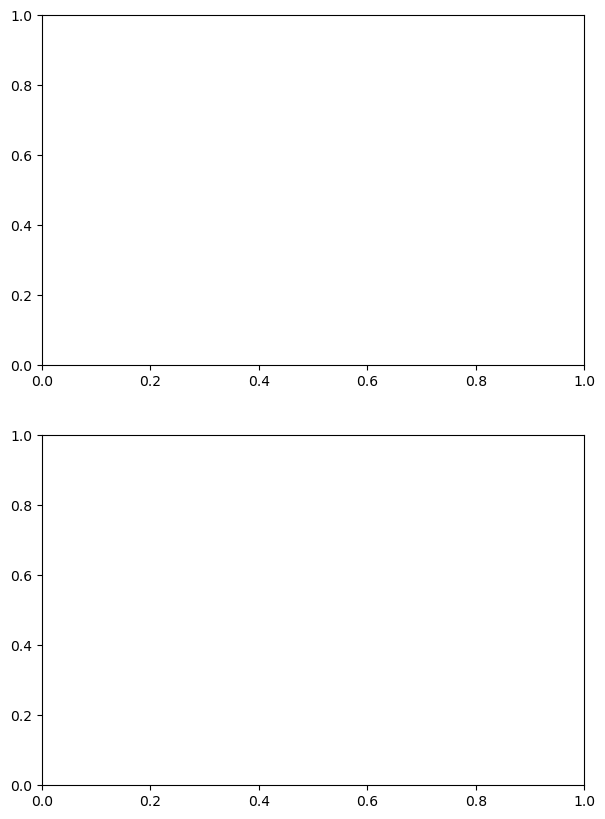

In [32]:
fig, ax = plt.subplots(2, 1, figsize = [7, 10])
data = [perc_10, perc_90]

for n,(cut1, cut2) in enumerate(data):
    poly1 = np.polyfit(cut1['Age'], cut1['Prot'], 1)
    fit1 = np.poly1d(poly1)
    poly2 = np.polyfit(cut2['Age'], cut2['Prot1'], 1)
    fit2 = np.poly1d(poly2)
    
    xs1 = np.linspace(min(cut1['Age']), max(cut1['Age']), 500)
    xs2 = np.linspace(min(cut2['Age']), max(cut2['Age']), 500)
    
    ax[n].plot(xs1, fit1(xs1))
    ax[n].plot(xs2, fit2(xs2))
    ax[n].scatter(cut1['Age'], cut1['Prot'], s = 1)
    ax[n].scatter(cut2['Age'], cut2['Prot1'], s = 1)
    ax[n].set_xscale('log')
    ax[n].set_xticks([1, 10, 1000, 10000])
#plt.savefig('percentile_revamped.png')   

In [ ]:
#Set sigma assumed to be 10%